In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Ecommerce - UK Retailer.csv',encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 1. Perform Basic EDA
### a. Boxplot – All Numeric Variables

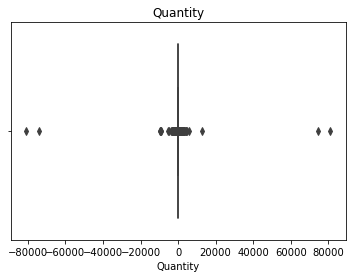

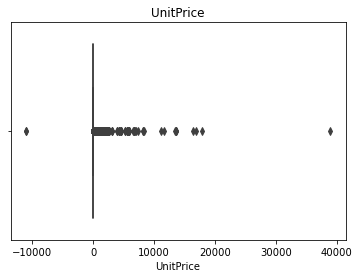

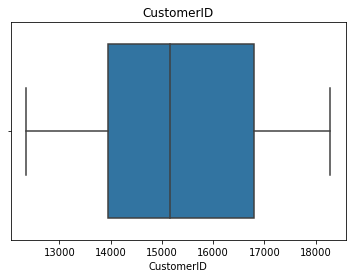

In [13]:
sns.boxplot(x=df['Quantity'],data=df)
plt.title('Quantity')
plt.show()

sns.boxplot(x=df['UnitPrice'])
plt.title('UnitPrice')
plt.show()

sns.boxplot(x=df['CustomerID'])
plt.title('CustomerID')
plt.show()

<AxesSubplot:>

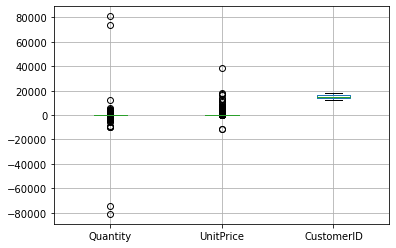

In [14]:
df.boxplot(column=['Quantity','UnitPrice','CustomerID'])

<AxesSubplot:>

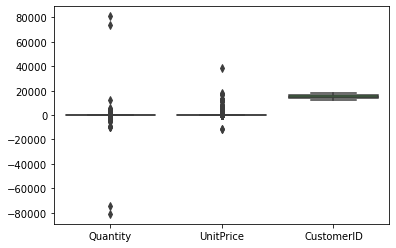

In [15]:
sns.boxplot(data=df)

### b. Histogram – All Numeric Variables

<AxesSubplot:ylabel='Count'>

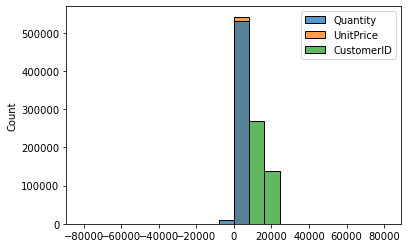

In [16]:
sns.histplot(data=df,bins=20)

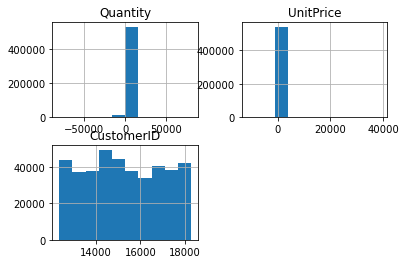

In [17]:
hist = df.hist(bins=10)

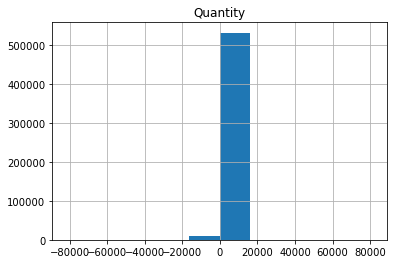

In [18]:
df.hist(column=['Quantity'])
plt.show()

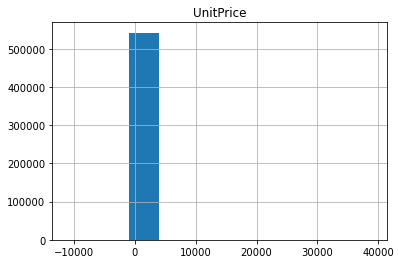

In [19]:
df.hist(column='UnitPrice')
plt.show()

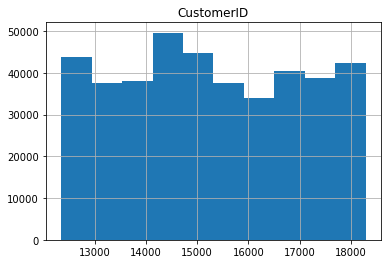

In [20]:
df.hist(column='CustomerID')
plt.show()

### c. Distribution Plot – All Numeric Variables

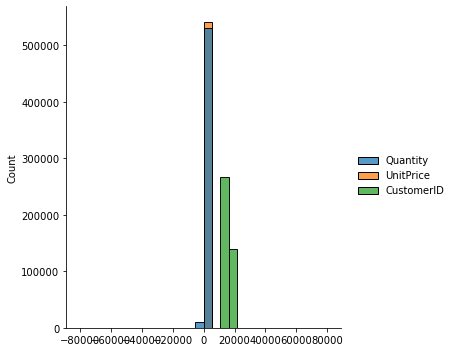

In [21]:
sns.displot(data=df,bins=30)

E:\datasci\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


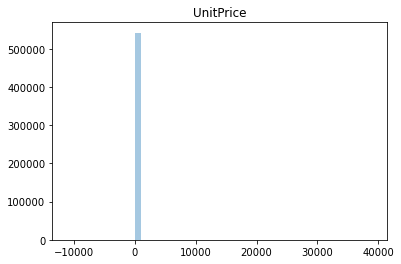

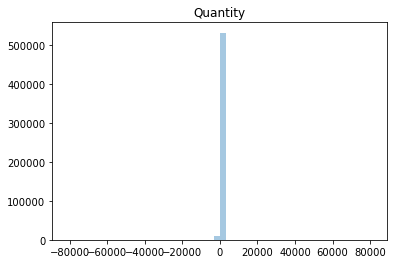

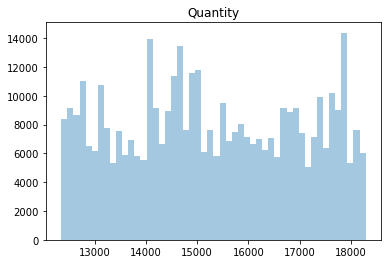

In [22]:
sns.distplot(x=df.UnitPrice,kde=False)
plt.title('UnitPrice')
plt.show()
sns.distplot(x=df.Quantity,kde=False)
plt.title('Quantity')
plt.show()
sns.distplot(x=df.CustomerID,kde=False)
plt.title('Quantity')
plt.show()

### d. Aggregation for all numerical Columns

In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique Values across all columns

In [24]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### f. Duplicate values across all columns

In [25]:
duplicate = df.duplicated()

In [26]:
duplicate.sum()

5268

In [27]:
dp = df[df.duplicated()]

In [28]:
dp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables

In [29]:
x=df[['Quantity','UnitPrice','CustomerID']]

In [30]:
x.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


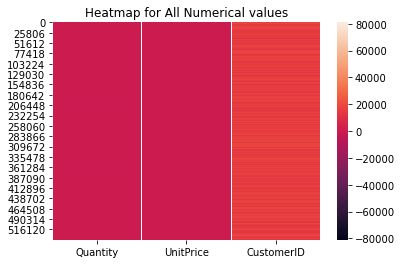

In [31]:
sns.heatmap(x)
plt.title('Heatmap for All Numerical values')
plt.show()

### h. Regression Plot - All Numeric Variables

In [32]:
df['StockCode'].nunique()

4070

In [33]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

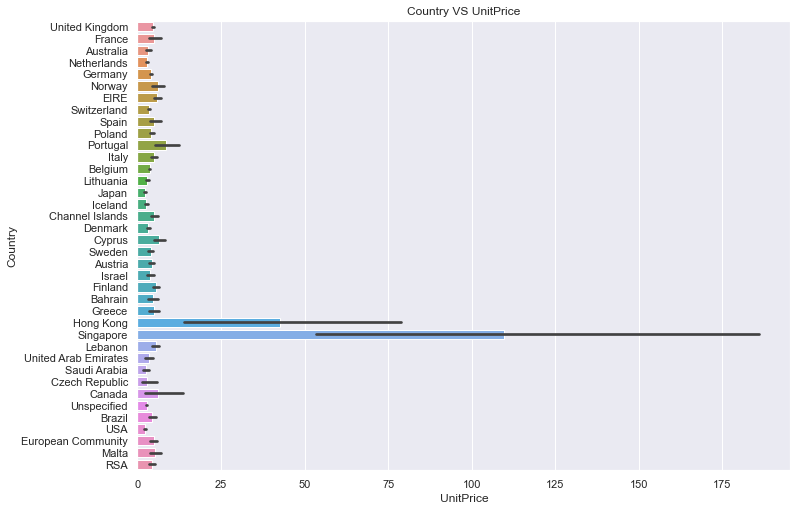

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='UnitPrice',y='Country',data=df)
plt.title('Country VS UnitPrice')
plt.show()

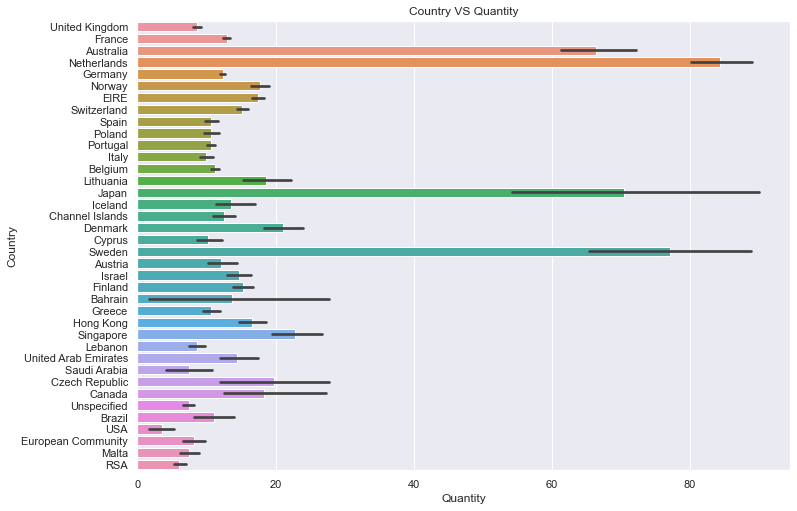

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Quantity',y='Country',data=df)
plt.title('Country VS Quantity')
plt.show()

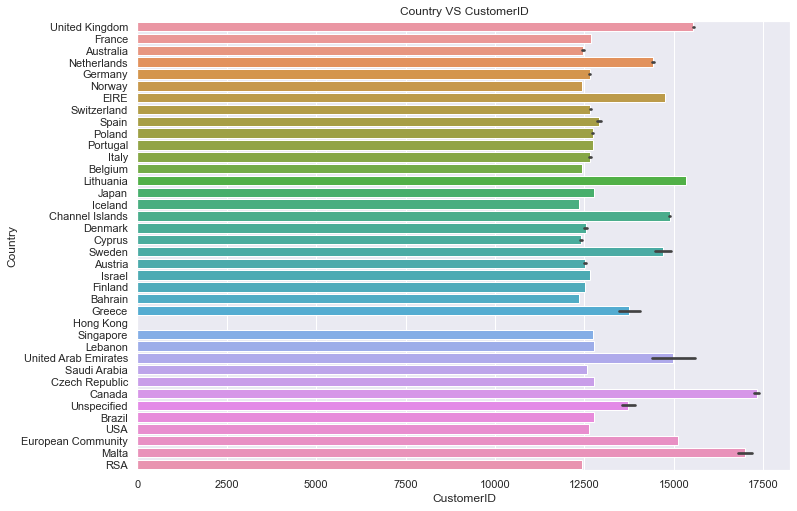

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='CustomerID',y='Country',data=df)
plt.title('Country VS CustomerID')
plt.show()

### j. Pair plot - All Numeric Variables

In [ ]:
sns.pairplot(df)

### k. Line chart to show the trend of data - All Numeric/Date Variables

In [54]:
df['year']= pd.DatetimeIndex(df['InvoiceDate']).year

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010


<AxesSubplot:xlabel='year', ylabel='UnitPrice'>

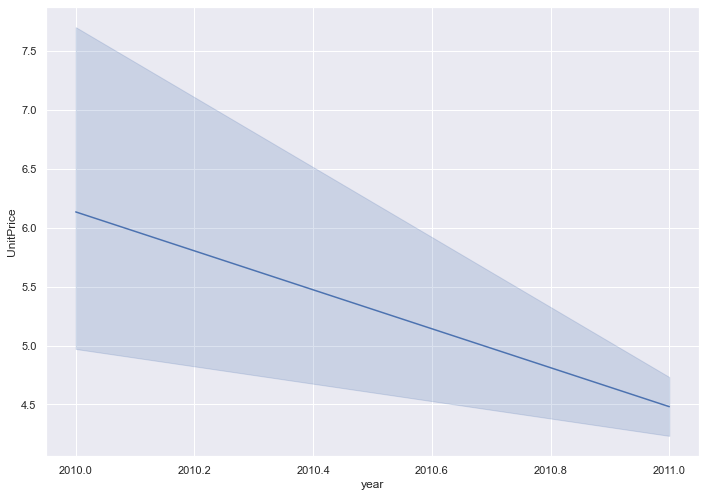

In [56]:
sns.lineplot(data=df,x='year',y='UnitPrice')

<AxesSubplot:xlabel='year', ylabel='Quantity'>

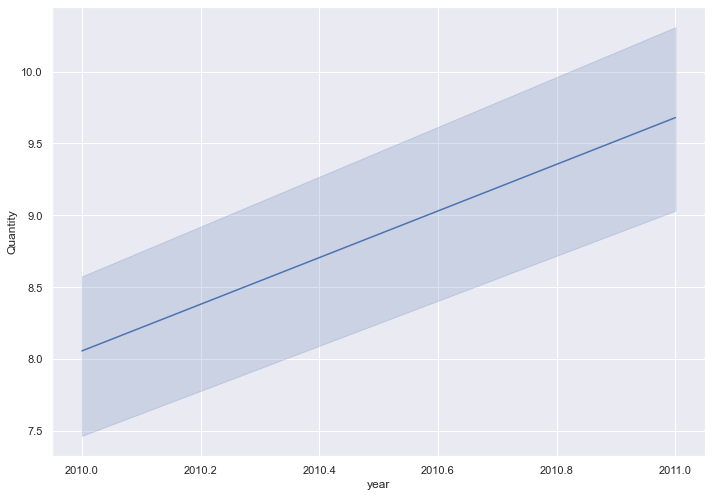

In [57]:
sns.lineplot(data=df,x='year',y='Quantity')

<AxesSubplot:xlabel='year', ylabel='CustomerID'>

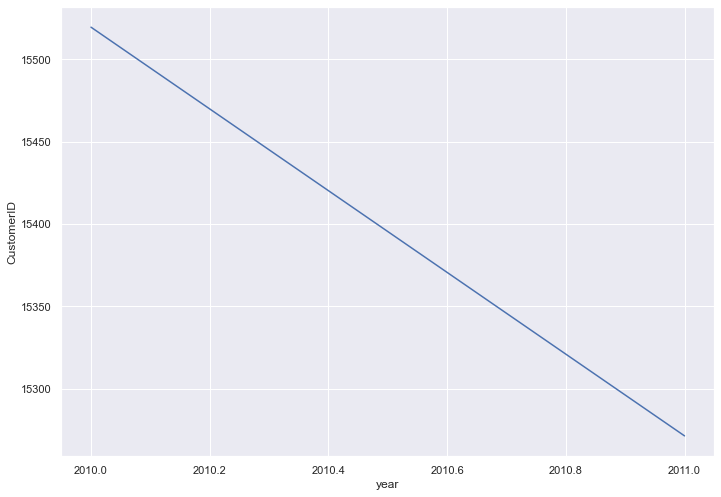

In [58]:
sns.lineplot(data=df,x='year',y='CustomerID')

### l. Plot the skewness - All Numeric Variables

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [59]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
year                0
dtype: int64

In [60]:
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [61]:
df['Description'].isnull().sum()

0

In [62]:
df['CustomerID'].mean()

15287.690570239585

In [63]:
df['CustomerID'].fillna(15287.6,inplace=True)

In [64]:
df['CustomerID'].isnull().sum()

0

### 3. Remove duplicate rows

In [65]:
df.duplicated().sum()

5268

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

In [68]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year


### 4. Remove rows which have negative values in Quantity column

In [69]:
x=df[df['Quantity'] < 0].index

In [70]:
df.drop(labels=x,inplace=True)

In [71]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year


### 5. Add the columns - Month, Day and Hour for the invoice

In [72]:
df['Month']=pd.DatetimeIndex(df['InvoiceDate']).month

In [73]:
df['Day']=pd.DatetimeIndex(df['InvoiceDate']).day

In [77]:
df['Hour']=pd.DatetimeIndex(df['InvoiceDate']).hour

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 6. How many orders made by the customers?

In [87]:
df.groupby(['CustomerID'],as_index=False)['InvoiceNo'].count()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4335,18280.0,10
4336,18281.0,7
4337,18282.0,12
4338,18283.0,721


### 7. TOP 5 customers with higher number of orders

In [90]:
df.groupby(['CustomerID'],as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False).head()

,CustomerID,InvoiceNo
2161,15287.6,133322
4012,17841.0,7676
1880,14911.0,5672
1290,14096.0,5111
326,12748.0,4413


### 8. How much money spent by the customers?

In [97]:
df.groupby(['CustomerID'],as_index=False)['UnitPrice'].sum()

,CustomerID,UnitPrice
0,12346.0,1.04
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30
...,...,...
4335,18280.0,47.65
4336,18281.0,39.36
4337,18282.0,62.39
4338,18283.0,1174.33


### 9. TOP 5 customers with highest money spent

In [100]:
df.groupby(['CustomerID'],as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False).head()

,CustomerID,UnitPrice
2161,15287.6,809226.54
1290,14096.0,33332.45
1880,14911.0,26150.35
4012,17841.0,19471.68
324,12744.0,12949.99


### 10. How many orders per month?

In [89]:
df.groupby(['Month'],as_index=False)['CustomerID'].count()

,Month,CustomerID
0,1,34104
1,2,26961
2,3,35609
3,4,28957
4,5,36044
5,6,35793
6,7,38466
7,8,34347
8,9,48962
9,10,58629


### 11. How many orders per day?

In [88]:
df.groupby(['Day'],as_index=False)['CustomerID'].count()

,Day,CustomerID
0,1,17035
1,2,16232
2,3,14049
3,4,19026
4,5,21467
5,6,23248
6,7,22350
7,8,23935
8,9,17658
9,10,19334


### 12. How many orders per hour?

In [87]:
df.groupby(['Hour'],as_index=False)['CustomerID'].count()


,Hour,CustomerID
0,6,1
1,7,379
2,8,8802
3,9,33738
4,10,47670
5,11,55592
6,12,76096
7,13,70067
8,14,65384
9,15,75851


### 13. How many orders for each country?

In [85]:
df.groupby(['Country'],as_index=False)['InvoiceNo'].count()

,Country,InvoiceNo
0,Australia,1184
1,Austria,398
2,Bahrain,18
3,Belgium,2031
4,Brazil,32
5,Canada,151
6,Channel Islands,747
7,Cyprus,603
8,Czech Republic,25
9,Denmark,380


### 14. Orders trend across months

In [99]:
df.groupby(['Description'])[['Month']].max()

,Month
Description,
4 PURPLE FLOCK DINNER CANDLES,12
50'S CHRISTMAS GIFT BAG LARGE,12
DOLLY GIRL BEAKER,12
I LOVE LONDON MINI BACKPACK,12
I LOVE LONDON MINI RUCKSACK,10
...,...
wrongly coded 20713,10
wrongly coded 23343,10
wrongly marked,10


### 15. How much money spent by each country?

In [96]:
df.groupby(['Country'],as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice')

,Country,UnitPrice
29,Saudi Arabia,2.116000e+01
8,Czech Republic,7.827000e+01
2,Bahrain,8.276000e+01
22,Lithuania,9.944000e+01
4,Brazil,1.426000e+02
35,United Arab Emirates,2.298900e+02
21,Lebanon,2.424400e+02
28,RSA,2.481000e+02
11,European Community,2.898000e+02
34,USA,4.133000e+02
